<a href="https://colab.research.google.com/github/tasawar301/final_year_ocular/blob/main/OCULAR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
import scipy.stats as stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2

In [2]:
path = 'https://raw.githubusercontent.com/tasawar301/final_year_ocular/refs/heads/main/dataset'

In [3]:
data_df = pd.read_csv(path+'/full_df.csv')

In [4]:
print("Size: "+ str(data_df.shape)+"\n\n")
display(data_df.info())
data_df.head()


Size: (6392, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   i

None

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
data_df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data_df.describe(include='object')

,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,filepath,labels,target,filename
count,6392,6392,6392,6392,6392,6392,6392,6392,6392
unique,2,3358,3358,196,205,6392,8,8,6392
top,Male,4784_left.jpg,4784_right.jpg,normal fundus,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",4784_left.jpg
freq,3424,2,2,2796,2705,1,2873,2873,1


In [7]:
data_df.isnull().sum()

,0
ID,0
Patient Age,0
Patient Sex,0
Left-Fundus,0
Right-Fundus,0
Left-Diagnostic Keywords,0
Right-Diagnostic Keywords,0
N,0
D,0
G,0


In [8]:
data_df.apply(lambda x: len(x.unique()))

,0
ID,3358
Patient Age,75
Patient Sex,2
Left-Fundus,3358
Right-Fundus,3358
Left-Diagnostic Keywords,196
Right-Diagnostic Keywords,205
N,2
D,2
G,2


In [9]:
data_df.duplicated().sum()

np.int64(0)

In [10]:
data_df['labels'].value_counts()

,count
labels,
['N'],2873
['D'],1608
['O'],708
['C'],293
['G'],284
['A'],266
['M'],232
['H'],128


In [11]:
diabete_df = data_df[data_df['labels']=='[\'D\']']
# display(diabete_df.head())
display(diabete_df.shape)

(1608, 19)

Diabetes Patients Age Statistics:
count    1608.000000
mean       55.699627
std        10.200721
min        17.000000
25%        49.000000
50%        56.000000
75%        63.000000
max        85.000000
Name: Patient Age, dtype: float64

Non-Diabetes Patients Age Statistics:
count    4784.000000
mean       58.583403
std        12.113070
min         1.000000
25%        52.000000
50%        60.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64 


T-test results: t-statistic=-8.578673730990161, p-value=1.191093099934713e-17



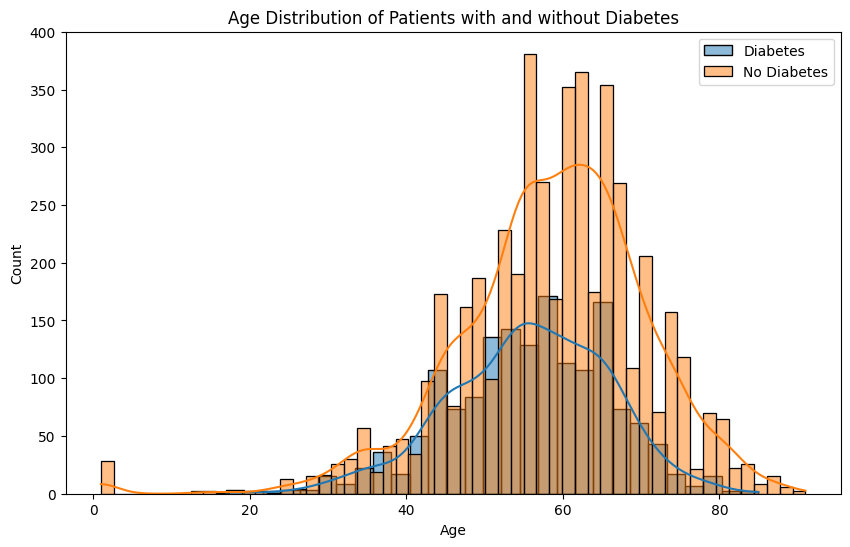

In [12]:
# diabetes_patients = data_df[data_df['labels'] == "['D']"]
non_diabetes_df = data_df[data_df['labels'] != "['D']"]

print("Diabetes Patients Age Statistics:")
print(diabete_df['Patient Age'].describe())

print("\nNon-Diabetes Patients Age Statistics:")
print(non_diabetes_df['Patient Age'].describe(),"\n")

t_statistic, p_value = ttest_ind(diabete_df['Patient Age'], non_diabetes_df['Patient Age'])
print(f"\nT-test results: t-statistic={t_statistic}, p-value={p_value}\n")

plt.figure(figsize=(10, 6))
sns.histplot(diabete_df['Patient Age'], kde=True, label='Diabetes')
sns.histplot(non_diabetes_df['Patient Age'], kde=True, label='No Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Patients with and without Diabetes')
plt.legend()
plt.show()

The t-test results indicate a statistically significant difference in age between patients diagnosed with diabetes and those without. Let's break down the values:

* **t-statistic = -8.57867:** This value represents the difference between the means of the two groups (diabetes patients and non-diabetes patients) in units of standard error.  A large absolute value of the t-statistic suggests a substantial difference between the group means.  The negative sign indicates that the average age of diabetes patients is *lower* than the average age of non-diabetes patients in this dataset.

* **p-value = 1.191093e-17:** This is a very small number (close to zero).  The p-value represents the probability of observing the obtained difference in means (or a more extreme difference) if there were *actually no difference* in the underlying population means.  A small p-value (typically below 0.05) indicates strong evidence *against* the null hypothesis (that there's no difference in age between the two groups).  In this case, the extremely small p-value provides very strong evidence that the observed age difference is not due to random chance.

**Conclusion:**

The results strongly suggest that there is a statistically significant difference in age between patients with and without diabetes in your dataset. The average age of diabetic patients is notably lower than the average age of non-diabetic patients.  The extremely low p-value reinforces the high confidence in this conclusion.

#### Diabetes in terms of age categories

Now Lets define the age categories for diabetes class, to monitor how the age are diseases features are related


In [1]:
# Dividing the diabetes data into different ages groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
diabete_df['Age_Group'] = pd.cut(diabete_df['Patient Age'], bins=bins, labels=labels, right=False)

# age_group_counts = diabete_df['Age_Group'].value_counts().sort_index()
# print(age_group_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=diabete_df)
plt.title('Distribution of Diabetes Patients across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()


NameError: name 'pd' is not defined

In [1]:
keywords = ['mild nonproliferative retinopathy', 'moderate non proliferative retinopathy',
            'severe proliferative diabetic retinopathy', 'proliferative', 'diabetic retinopathy','normal fundus']

def filter_keywords(text):
  if isinstance(text, str):
    for keyword in keywords:
      if keyword in text.lower():
        return keyword
  return "non-diabetic symptoms"


diabete_df['Left_diabete_stage'] = diabete_df['Left-Diagnostic Keywords'].apply(filter_keywords)
diabete_df['Right_diabete_stage'] = diabete_df['Right-Diagnostic Keywords'].apply(filter_keywords)


NameError: name 'diabete_df' is not defined

In [2]:
diabete_stage_df = diabete_df[['ID','Patient Age','Patient Sex','Age_Group','Left_diabete_stage','Right_diabete_stage']]

NameError: name 'diabete_df' is not defined

In [3]:
diabete_stage_df

NameError: name 'diabete_stage_df' is not defined